## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Question 1

#### Read the iris.csv file

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [5]:
df.SepalLengthCm.fillna(df.SepalLengthCm.median(),inplace=True)
df.SepalWidthCm.fillna(df.SepalWidthCm.median(),inplace=True)
df.PetalLengthCm.fillna(df.PetalLengthCm.median(),inplace=True)
df.PetalWidthCm.fillna(df.PetalWidthCm.median(),inplace=True)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [8]:
df.Species=df.Species.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [11]:
df.corr()
# No variable has corelation between -0.1 and 0.1 with target variable

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [13]:
df.var()
# No variable in the dataset has variance <0.1

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

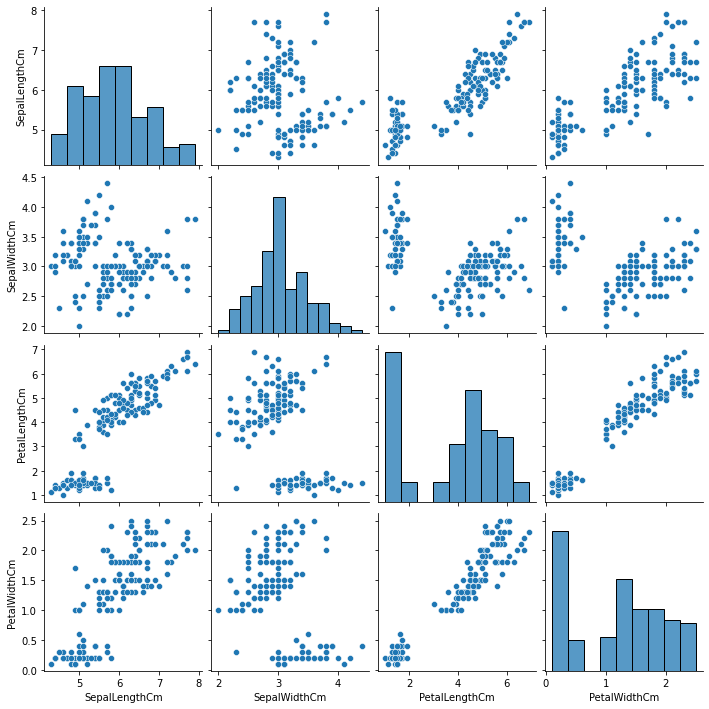

In [15]:
sns.pairplot(data=df.drop(columns=['Id','Species']))
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [16]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Id','Species'])
y=df.Species
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k=[3,5,9]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    print('Accuracy score for k=',i,'is equal to',accuracy_score(y_test,pred))

Accuracy score for k= 3 is equal to 1.0
Accuracy score for k= 5 is equal to 1.0
Accuracy score for k= 9 is equal to 0.9354838709677419


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [22]:
mse=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    mse.append(1-accuracy_score(y_test,pred))
    print('MSE for k=',i,'is equal to',1-accuracy_score(y_test,pred))

MSE for k= 1 is equal to 0.0
MSE for k= 2 is equal to 0.032258064516129004
MSE for k= 3 is equal to 0.0
MSE for k= 4 is equal to 0.0
MSE for k= 5 is equal to 0.0
MSE for k= 6 is equal to 0.0
MSE for k= 7 is equal to 0.0
MSE for k= 8 is equal to 0.032258064516129004
MSE for k= 9 is equal to 0.06451612903225812
MSE for k= 10 is equal to 0.032258064516129004
MSE for k= 11 is equal to 0.06451612903225812
MSE for k= 12 is equal to 0.032258064516129004
MSE for k= 13 is equal to 0.0
MSE for k= 14 is equal to 0.0
MSE for k= 15 is equal to 0.032258064516129004
MSE for k= 16 is equal to 0.032258064516129004
MSE for k= 17 is equal to 0.032258064516129004
MSE for k= 18 is equal to 0.06451612903225812
MSE for k= 19 is equal to 0.032258064516129004


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

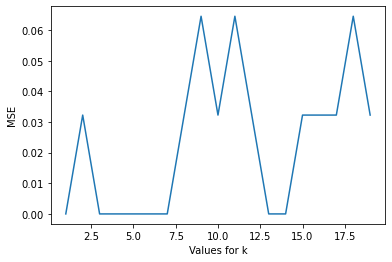

In [27]:
plt.plot(range(1,20),mse)
plt.xlabel('Values for k')
plt.ylabel('MSE')
plt.show()

# Naive Bayes

In [1]:
#Load all required library

### Question 1
#### Import Iris.csv

In [26]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...,...
147,148,6.5,3.0,5.20,2.0,2
148,149,6.2,3.4,5.40,2.3,2
149,150,5.9,3.0,5.10,1.8,2
150,151,5.9,3.0,4.35,1.3,2


### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [29]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Id','Species'])
y=df.Species

## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

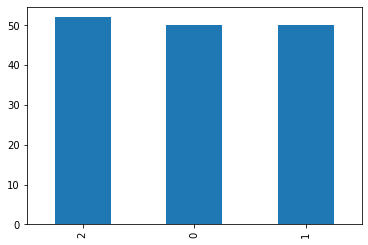

In [33]:
df.Species.value_counts().plot.bar()
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it.

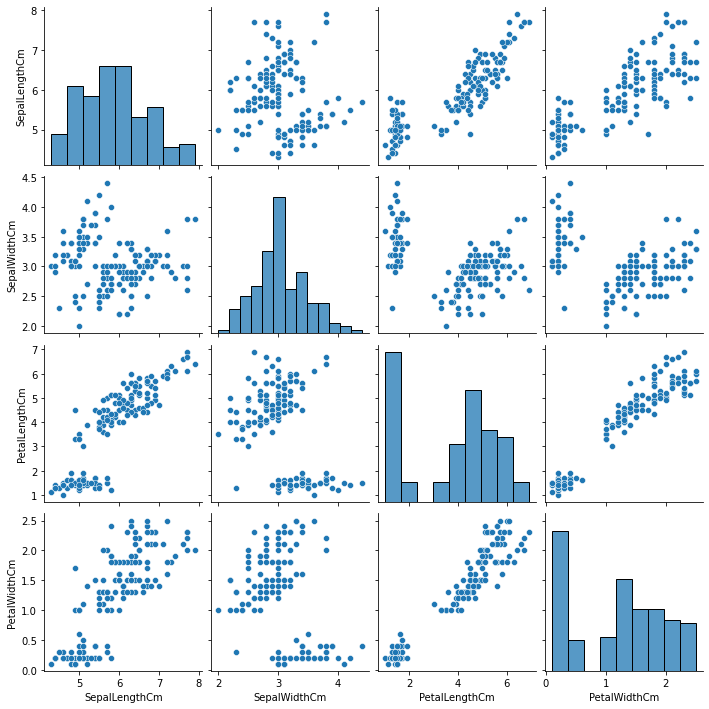

In [34]:
sns.pairplot(data=df.drop(columns=['Id','Species']))
plt.show()

In [ ]:
# Sepal length doesnt seem to have a relation with sepal width
# sepal length seems to be positively related with petal length
# Sepal length seems to be positively related with petal width

### Question 3
#### Find Correlation among all variables and give your insights 

In [39]:
df.corr()[df.corr()>0.6].fillna('')
# There seems to be high multicolinearity in the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.0,0.702734,,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.0,,0.87112,0.815986,0.775061
SepalWidthCm,,,1.0,,,
PetalLengthCm,0.872346,0.87112,,1.0,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,,0.962043,1.0,0.952513
Species,0.942753,0.775061,,0.944477,0.952513,1.0


### Question 4
#### Split data in Training and Validation in 80:20

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=22)

### Question 5
#### Do Feature Scaling 

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(sc.fit_transform(x_test),columns=x_test.columns)

### Question 6 
#### Train and Fit NaiveBayes Model

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model=gnb.fit(x_train,y_train)

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

In [49]:
pred=model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
accuracy_score(y_test,pred)

1.0

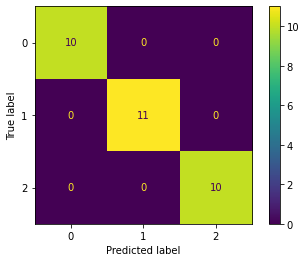

In [53]:
cm=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [54]:
# The model has predicted every class with 100% accuracy